# Implementing K-Means clustering from scratch
* We'll use the Iris dataset from scikit-learn (we'll only use two features out of the original four  for simplicity).


# Step 1: Loading the data

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
# All rows, only the last two columns(features)
X = iris.data[:, 2:4]
y = iris.target


# Step 2: Visualizing the targets (labels)
* We'll plot the three different classes

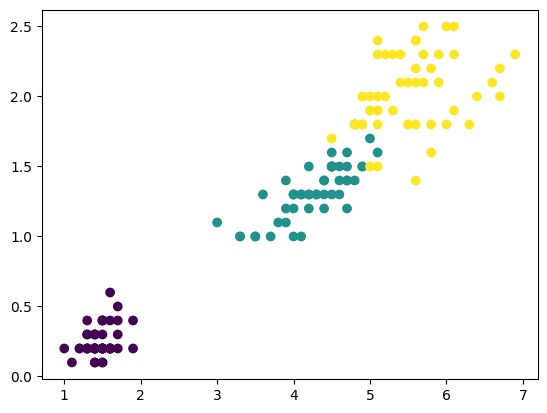

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

# Step 3: Specifying k and Initializing centroids
* We specify 3 centroids k = 3
* We'll randomly select three samples as initial centroids

In [3]:
np.random.seed(2)

k = 3

random_index = np.random.choice(range(len(X)), k)

# We've randomly grabbed 3 samples from our feature vector(X)
centroids = X[random_index]
centroids

array([[1.5, 0.4],
       [4.9, 1.5],
       [1. , 0.2]])

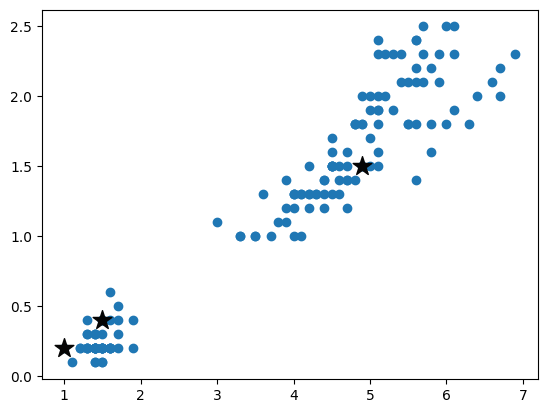

In [4]:
# Visualizing the randomly selected centroids
def visualize_centroids(X, centroids):
    plt.scatter(X[:,0],X[:,1])
    plt.scatter(centroids[:,0], centroids[:, 1], marker="*", s=200, c='#050505')
    plt.show()
    
visualize_centroids(X, centroids)

# Step 3: Calculating Euclidean Distance and Assigning samples to Nearest Centroids
* We'll implement a function that calculates the Euclidian distance of two samples (a, b)
* We'll then assign a sample to the cluster of the nearest centroid.


In [5]:
def dist(a, b):
    """
    The function takes two arrays a and b as input parameters.
    np.linalg.norm computes the norm of the difference between a and b. The axis = 1 parameter specifies that the norm should be calculated along the second axis, which is the row axis.
    The function returns the calculated distance, which is an array of distances between each pair of rows in a and b.
    """
    return np.linalg.norm(a-b, axis = 1)

In [6]:
def assign_cluster(x, centroids):
    """
    The function assign_cluster takes two arguments: x and centroids.
    The line distances = dist(x, centroids) calls the dist function to calculate the distances between the data point x and each centroid in the centroids array. The resulting distances are stored in the distances variable.
    The line cluster = np.argmin(distances) finds the index of the minimum value in the distances array using np.argmin. This index represents the cluster to which the data point x is assigned based on the closest centroid.
    Finally, the function returns the cluster index, indicating the assigned cluster for the data point x.
    """
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

# Step 4: Updating the centroids to the mean of all samples


In [7]:
def update_centroids(X, centroids, clusters):
    """
    The update_centroids function recalculates the centroids based on the current assignment of data points to clusters. 
    It iterates over each cluster, finds the data points belonging to that cluster, and calculates the mean to obtain the new centroid coordinates for each cluster.
    """
    # K was defined outside the function, it's the number of clusters(3)
    for i in range(k):
        # np.where to find the indices in the clusters array where the cluster index is equal to i.
        # This identifies the data points that belong to the current cluster i and stores their indices in the cluster_i variable.
        cluster_i = np.where(clusters == i)
        # calculates the mean of the data points in cluster i by indexing X with the cluster_i indices. 
        centroids[i] = np.mean(X[cluster_i], axis = 0)

# Step 5: Iterating until the model converges
* We'll repeat the previous steps until the model converges and whichever of the following occurs: 
1. Centroids move less than the pre-specified threshold
2. Sufficient iterations have been taken

In [8]:
# Setting the tolerance
tol = 0.0001
# Setting the max number of iterations
max_iter = 1000

In [9]:
# Initializing the cluster's starting values and the starting clusters for all samples
iter = 0
centroids_diff = 100_000
clusters = np.zeros(len(X))

1
2
Iteration: 2
Centroids:
 [[1.55609756 0.27560976]
 [4.92525253 1.68181818]
 [1.23       0.21      ]]
Centroids move: 0.1155


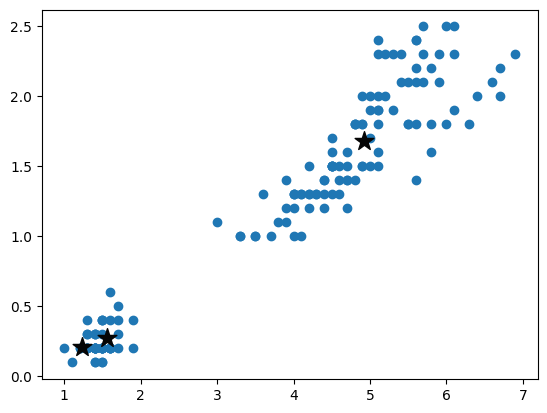

3
4
Iteration: 4
Centroids:
 [[1.652      0.32      ]
 [4.92525253 1.68181818]
 [1.33846154 0.20769231]]
Centroids move: 0.0460


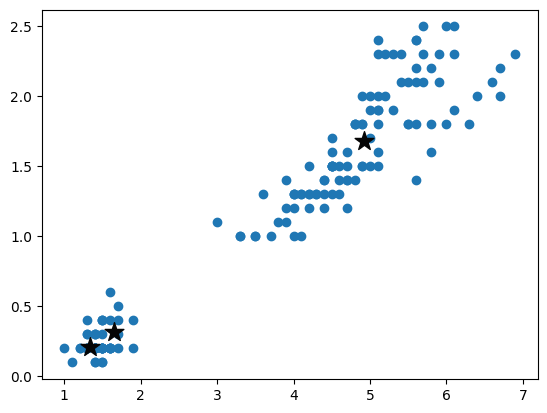

5
6
Iteration: 6
Centroids:
 [[1.88947368 0.43684211]
 [4.95876289 1.69587629]
 [1.37647059 0.20882353]]
Centroids move: 0.1951


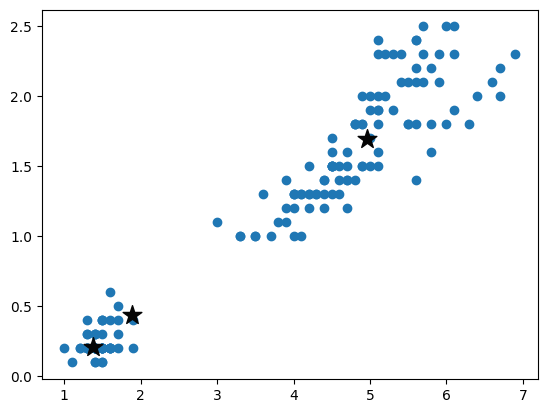

7
8
Iteration: 8
Centroids:
 [[2.91428571 0.81428571]
 [4.98947368 1.71052632]
 [1.44375    0.24375   ]]
Centroids move: 0.8304


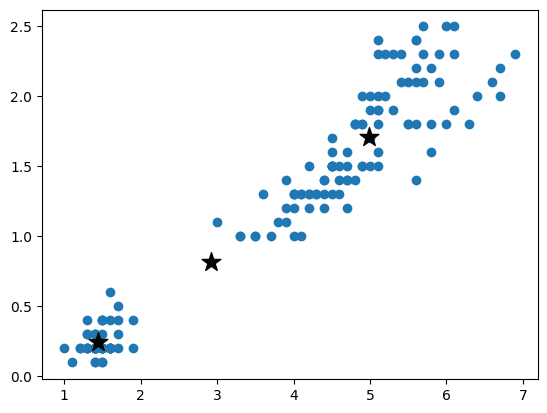

9
10
Iteration: 10
Centroids:
 [[3.90384615 1.19230769]
 [5.25810811 1.84594595]
 [1.462      0.246     ]]
Centroids move: 0.3966


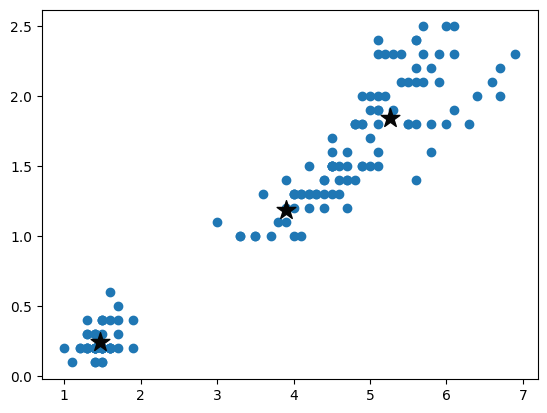

11
12
Iteration: 12
Centroids:
 [[4.19130435 1.30217391]
 [5.51481481 1.99444444]
 [1.462      0.246     ]]
Centroids move: 0.1459


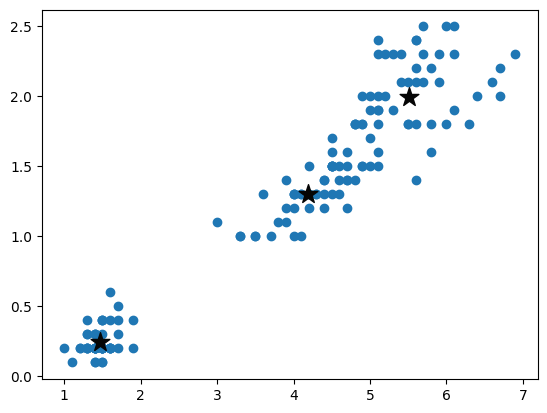

13
14
Iteration: 14
Centroids:
 [[4.25490196 1.33921569]
 [5.58367347 2.02653061]
 [1.462      0.246     ]]
Centroids move: 0.0648


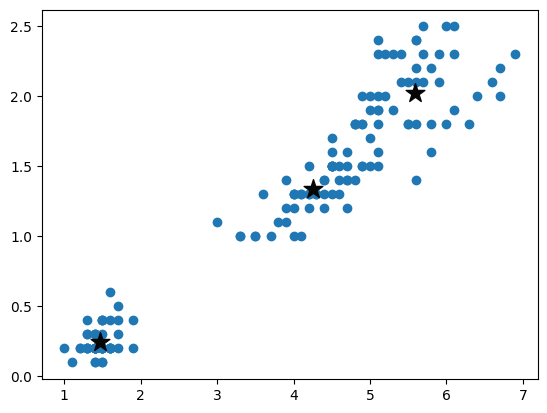

15
16
Iteration: 16
Centroids:
 [[4.26923077 1.34230769]
 [5.59583333 2.0375    ]
 [1.462      0.246     ]]
Centroids move: 0.0000


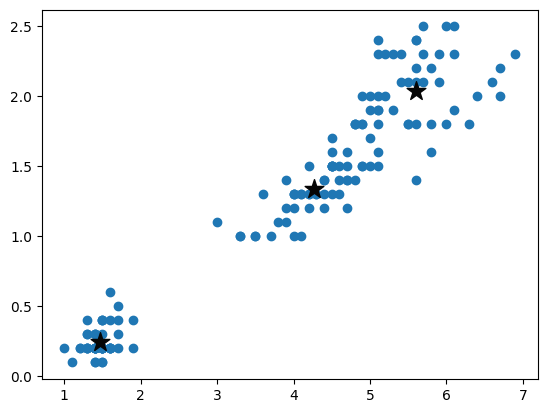

In [10]:
# Training the model iteration by iteration
from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    # Assign data points to clusters
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
        
    # Store previous centroids for convergence check
    centroids_prev = deepcopy(centroids)
    
    # Update centroids based on current assignments
    update_centroids(X, centroids, clusters)
    iter += 1
    print(iter)
    
    # Calculate the difference between current and previous centroids
    centroids_diff = np.linalg.norm(centroids-centroids_prev)
    
    # Print iteration information every 2 iterations
    if iter % 2 == 0: 
        print('Iteration:', str(iter))
        print('Centroids:\n', centroids)
        print('Centroids move: {:5.4f}'.format(centroids_diff))
        
        # Visualize the current centroids and data points
        visualize_centroids(X, centroids)
            
            

# Final step: Plotting the Clusters
* After convergence, we'll now plot the centroids and clusters

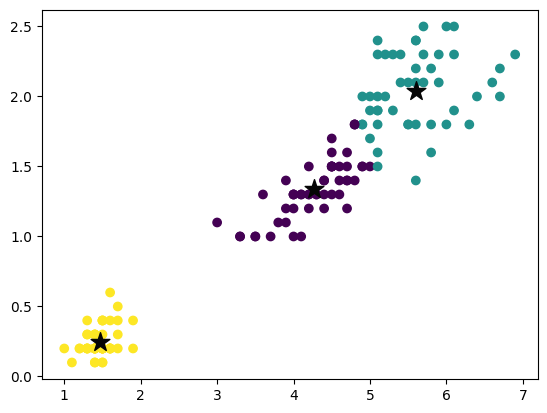

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s=200, c="#050505")